In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
df = pd.read_pickle('data_RDFs_purePt-intel.pkl')
df


,shape,size,natoms,N1,N2,N3,R1,R2,R3,rdf0,...,rdf149,rdf150,rdf151,rdf152,rdf153,rdf154,rdf155,rdf156,rdf157,rdf158
0,sph,14.43,141.0,9.42,3.80,13.85,2.743,3.905,4.766,0.0,...,0.008794,0.002270,0.001135,0.000567,0.000284,0.000000,0.000000,0.000284,0.000000,0.002270
1,sph,18.56,249.0,10.69,4.56,15.08,2.758,3.924,4.786,0.0,...,0.010763,0.004498,0.002088,0.000000,0.000161,0.000000,0.000321,0.001767,0.001928,0.004177
2,sph,22.70,453.0,9.83,4.61,16.97,2.764,3.918,4.792,0.0,...,0.038852,0.019338,0.009095,0.004415,0.002737,0.001236,0.000618,0.001060,0.001148,0.002649
3,sph,25.53,683.0,10.19,5.59,18.18,2.765,3.919,4.800,0.0,...,0.056281,0.030981,0.016808,0.010600,0.006149,0.003631,0.004392,0.003631,0.001933,0.002460
4,sph,30.36,1061.0,10.38,4.85,18.54,2.773,3.932,4.806,0.0,...,0.087729,0.047163,0.026692,0.012403,0.005881,0.003205,0.001810,0.001131,0.001056,0.001320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,faced,93.75,14505.0,10.44,4.00,19.83,2.776,3.930,4.826,0.0,...,0.331541,0.213168,0.149397,0.087004,0.056670,0.032541,0.020131,0.012823,0.007377,0.003240
794,faced,93.74,15593.0,10.68,4.54,19.64,2.785,3.943,4.825,0.0,...,0.340986,0.228308,0.144424,0.091580,0.058103,0.035529,0.018149,0.012121,0.007247,0.004810
795,faced,93.46,16217.0,10.16,4.11,19.85,2.789,3.945,4.826,0.0,...,0.345193,0.235987,0.157551,0.098909,0.060060,0.035642,0.019362,0.012148,0.006721,0.004378
796,faced,93.85,16505.0,10.39,4.42,19.81,2.783,3.943,4.828,0.0,...,0.347289,0.226174,0.149349,0.095123,0.055317,0.034535,0.019267,0.011875,0.006907,0.004120


In [54]:
df['target'] = df['shape'].apply(lambda x: 1 if x == 'faced' else 0)


In [55]:
features = [col for col in df.columns if col not in ['shape', 'nations', 'target']]
X = df[features]
y = df['target']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

# Создание и обучение модели
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

# Предсказание и оценка
y_pred = model_lr.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))


Accuracy: 0.91
Confusion Matrix:
 [[  1  10]
 [  4 145]]
0.9354838709677419
0.9731543624161074


In [59]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)  # Нормировка не обязательна для Random Forest

y_pred = model_rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.92


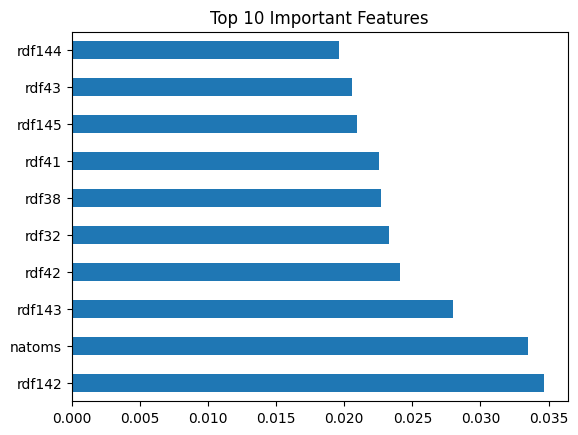

In [60]:
import matplotlib.pyplot as plt

importances = model_rf.feature_importances_
top_features = pd.Series(importances, index=features).sort_values(ascending=False)[:10]
top_features.plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_rf, X, y, cv=5)
print(f"Cross-Validation Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

Cross-Validation Accuracy: 0.79 ± 0.23


In [62]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
grid = GridSearchCV(model_rf, params, cv=3)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)

Best params: {'max_depth': 5, 'n_estimators': 100}
